In [1]:
stopwords = [
    "a",
    "about",
    "above",
    "after",
    "again",
    "against",
    "all",
    "am",
    "an",
    "and",
    "any",
    "are",
    "as",
    "at",
    "be",
    "because",
    "been",
    "before",
    "being",
    "below",
    "between",
    "both",
    "but",
    "by",
    "could",
    "did",
    "do",
    "does",
    "doing",
    "down",
    "during",
    "each",
    "few",
    "for",
    "from",
    "further",
    "had",
    "has",
    "have",
    "having",
    "he",
    "hed",
    "hes",
    "her",
    "here",
    "heres",
    "hers",
    "herself",
    "him",
    "himself",
    "his",
    "how",
    "hows",
    "i",
    "id",
    "ill",
    "im",
    "ive",
    "if",
    "in",
    "into",
    "is",
    "it",
    "its",
    "itself",
    "lets",
    "me",
    "more",
    "most",
    "my",
    "myself",
    "nor",
    "of",
    "on",
    "once",
    "only",
    "or",
    "other",
    "ought",
    "our",
    "ours",
    "ourselves",
    "out",
    "over",
    "own",
    "same",
    "she",
    "shed",
    "shell",
    "shes",
    "should",
    "so",
    "some",
    "such",
    "than",
    "that",
    "thats",
    "the",
    "their",
    "theirs",
    "them",
    "themselves",
    "then",
    "there",
    "theres",
    "these",
    "they",
    "theyd",
    "theyll",
    "theyre",
    "theyve",
    "this",
    "those",
    "through",
    "to",
    "too",
    "under",
    "until",
    "up",
    "very",
    "was",
    "we",
    "wed",
    "well",
    "were",
    "weve",
    "were",
    "what",
    "whats",
    "when",
    "whens",
    "where",
    "wheres",
    "which",
    "while",
    "who",
    "whos",
    "whom",
    "why",
    "whys",
    "with",
    "would",
    "you",
    "youd",
    "youll",
    "youre",
    "youve",
    "your",
    "yours",
    "yourself",
    "yourselves",
]

In [2]:
# Load data from JSON file

import json
from bs4 import BeautifulSoup
import string

sentences = []
labels = []

with open("./sarcasm.json", "r") as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []

table = str.maketrans("", "", string.punctuation)

for item in datastore:
    sentence = item["headline"].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")

    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()

    words = sentence.split()

    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "

    sentences.append(filtered_sentence)
    labels.append(item["is_sarcastic"])
    urls.append(item["article_link"])

/var/folders/yq/6hjjmqgj63s0mxztlhxls6r80000gn/T/ipykernel_94759/1492615037.py:26: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


In [7]:
training_size = 24000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
# Note: To make this import work, I needed to `conda install pip`
#       and then `pip install tensorflow-hub` in a conda environment
import tensorflow_hub as hub
import tensorflow as tf
import tf_keras as keras

In [9]:
# Create and compile the model

hub_layer = hub.KerasLayer(
    "https://www.kaggle.com/models/google/gnews-swivel/TensorFlow2/tf2-preview-20dim/1",
    output_shape=[20],
    input_shape=[],
    dtype=tf.string,
)

model = keras.Sequential(
    [
        hub_layer,
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

adam = keras.optimizers.Adam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False
)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])

history = model.fit(
    training_sentences,
    training_labels,
    epochs=50,
    validation_data=(testing_sentences, testing_labels),
    verbose=1,
)

Epoch 1/50
750/750 [==============================] - 1s 640us/step - loss: 0.7160 - accuracy: 0.5282 - val_loss: 0.6850 - val_accuracy: 0.5583
Epoch 2/50
750/750 [==============================] - 0s 573us/step - loss: 0.6829 - accuracy: 0.5626 - val_loss: 0.6675 - val_accuracy: 0.5913
Epoch 3/50
750/750 [==============================] - 0s 547us/step - loss: 0.6691 - accuracy: 0.5896 - val_loss: 0.6586 - val_accuracy: 0.6075
Epoch 4/50
750/750 [==============================] - 0s 473us/step - loss: 0.6614 - accuracy: 0.6069 - val_loss: 0.6527 - val_accuracy: 0.6181
Epoch 5/50
750/750 [==============================] - 0s 498us/step - loss: 0.6560 - accuracy: 0.6186 - val_loss: 0.6483 - val_accuracy: 0.6268
Epoch 6/50
750/750 [==============================] - 0s 468us/step - loss: 0.6519 - accuracy: 0.6253 - val_loss: 0.6446 - val_accuracy: 0.6324
Epoch 7/50
750/750 [==============================] - 0s 470us/step - loss: 0.6485 - accuracy: 0.6285 - val_loss: 0.6414 - val_accuracy:

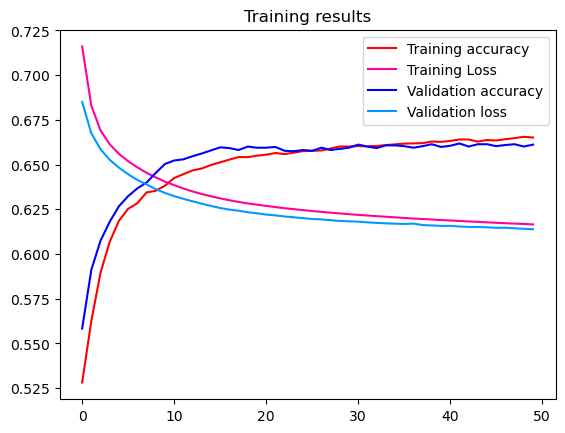

In [10]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.title("Training results")

plt.plot(epochs, acc, "#ff0000", label="Training accuracy")
plt.plot(epochs, loss, "#ff0099", label="Training Loss")
plt.plot(epochs, val_acc, "#0000ff", label="Validation accuracy")
plt.plot(epochs, val_loss, "#0099ff", label="Validation loss")

plt.legend()

plt.show()